In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import sys

path0 = 'D:/SAWS_code'
path = path0 + '/synthetic/synthetic_scv/results'
sys.path.append(path0)

In [2]:
seed_list = [10000 * (i+1) + j for i in range(20) for j in range(2)] + [10000 * (i+1) + 2 for i in range(10)]
MA_power = ['onethird', 'half', 'twothirds', 'full']
num_seeds = len(seed_list)

horizon_list = [250, 500, 1000, 2000, 4000, 8000]
num_horizons = len(horizon_list)

regrets = dict()
regrets['SAWS'] = np.zeros((num_seeds, num_horizons))
for power in MA_power:
    regrets[power] = np.zeros((num_seeds, num_horizons))

# read regrets for fixed-window benchmarks
for power in MA_power:
    for (N_idx, N) in enumerate(horizon_list):
        for (seed_idx, seed) in enumerate(seed_list):
            with open(path + '/scv_MA_{}_N{}_s{}.txt'.format(power, N, seed), "rb") as fp:
                reg_list = pickle.load(fp)
                regrets[power][seed_idx, N_idx] = reg_list[-1]

# read regrets for SAWS
for (N_idx, N) in enumerate(horizon_list):
    for (seed_idx, seed) in enumerate(seed_list):
        with open(path + '/scv_SAWS_N{}_s{}.txt'.format(N, seed), "rb") as fp:
            reg_list = pickle.load(fp)
            regrets['SAWS'][seed_idx, N_idx] = reg_list[-1]

In [3]:
# mean regrets of different algorithms
means = dict()
means['SAWS'] = np.zeros(num_horizons)
for power in MA_power:
    means[power] = np.zeros(num_horizons)

# standard deviations of the regrets
stds = dict()
stds['SAWS'] = np.zeros(num_horizons)
for power in MA_power:
    stds[power] = np.zeros(num_horizons)

# standard errors of the mean regrets
sems = dict()
sems['SAWS'] = np.zeros(num_horizons)
for power in MA_power:
    sems[power] = np.zeros(num_horizons)

for power in MA_power:
    means[power] = np.mean(regrets[power], axis=0)
    stds[power] = np.std(regrets[power], axis=0)
    sems[power] = np.std(regrets[power], axis=0) / np.sqrt(num_seeds)

means['SAWS'] = np.mean(regrets['SAWS'], axis=0)
stds['SAWS'] = np.std(regrets['SAWS'], axis=0)
sems['SAWS'] = np.std(regrets['SAWS'], axis=0) / np.sqrt(num_seeds)

In [4]:
# log-log plot
def plot_logscale(fig, mean, band, N_list, marker, color):
    fig.fill_between(N_list, np.log2(mean - band), np.log2(mean + band), alpha = 0.2, color = color)
    fig.plot(N_list, np.log2(mean), marker, color = color)

- - - Log-log plot: Synthetic data for strongly convex case
Curves and error bands are means and standard errors over 50 random seeds
onethird : orange
half : blue
twothirds : purple
full : black
SAWS : red


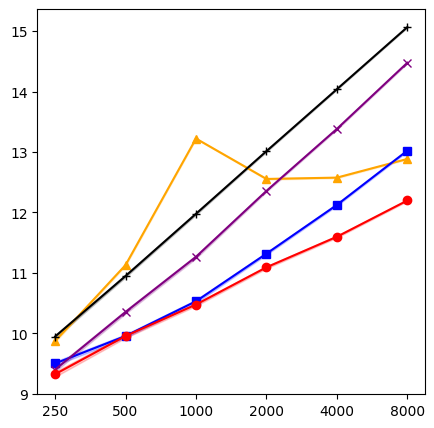

In [6]:
print('- - - Log-log plot: Synthetic data for strongly convex case')
print('Curves and error bands are means and standard errors over {} random seeds'.format(len(seed_list)))

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
colors = {'onethird':'orange', 'half':'blue', 'twothirds':'purple', 'full':'black', 'SAWS':'red'}
markers = {'onethird':'^-', 'half':'s-', 'twothirds':'x-', 'full':'+-', 'SAWS':'o-'}

for alg in colors.keys():
    plot_logscale(ax, means[alg], sems[alg], np.log2(horizon_list), marker=markers[alg], color=colors[alg])
    print('{} : {}'.format(alg, colors[alg]))
ax.set_xticks(np.log2(horizon_list));
ax.set_xticklabels(horizon_list);

plt.savefig('figures/scv.pdf')